In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data
Data Source: https://archive.ics.uci.edu/ml/datasets/Dermatology

Description: the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.
Attribute Information:

Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)

1: erythema

2: scaling

3: definite borders

4: itching

5: koebner phenomenon

6: polygonal papules

7: follicular papules

8: oral mucosal involvement

9: knee and elbow involvement

10: scalp involvement

11: family history, (0 or 1)

34: Age (linear)


Histopathological Attributes: (take values 0, 1, 2, 3)

12: melanin incontinence

13: eosinophils in the infiltrate

14: PNL infiltrate

15: fibrosis of the papillary dermis

16: exocytosis

17: acanthosis

18: hyperkeratosis

19: parakeratosis

20: clubbing of the rete ridges

21: elongation of the rete ridges

22: thinning of the suprapapillary epidermis

23: spongiform pustule

24: munro microabcess

25: focal hypergranulosis

26: disappearance of the granular layer

27: vacuolisation and damage of basal layer

28: spongiosis

29: saw-tooth appearance of retes

30: follicular horn plug

31: perifollicular parakeratosis

32: inflammatory monoluclear inflitrate

33: band-like infiltrate


Objective: Classification of label Class

        Class code:   Class:                  Number of instances:
       1             psoriasis	         		 112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20


In [2]:
INPUT_DATA_PATH = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'DATA', 'Dermatology')
OUTPUT_DATA_PATH = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'DATA', 'Ensemble_Output')
files_ = []
for root, dirs, files in os.walk(INPUT_DATA_PATH):
    for filename in files:
        RAW_DATA = os.path.join(INPUT_DATA_PATH, filename)
        try: 
            if '.csv' in filename or '.data' in filename or '.xlsx' in filename:
                files_.append(RAW_DATA)
                print("%s: %d bytes"%(filename, os.path.getsize(RAW_DATA)))
        except FileNotFoundError:
            break
print(INPUT_DATA_PATH,"\t", OUTPUT_DATA_PATH)


dermatology.data: 25964 bytes
/Users/gaurikatyagi/Documents/ML/DATA/Dermatology 	 /Users/gaurikatyagi/Documents/ML/DATA/Ensemble_Output


Let us read the train file and see what they contain

In [3]:
for data_file in files_:
    print("File:", data_file)
    input_data = pd.read_csv(data_file)
    print("Input data shape:", input_data.shape)
    display(HTML(input_data.head(5).to_html()))
    print("\n\n")

File: /Users/gaurikatyagi/Documents/ML/DATA/Dermatology/dermatology.data
Input data shape: (365, 35)


,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,0.9,0.10,3.1,2.2,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,2


In [4]:
derma = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'dermatology.data'), 
                    sep = ',', 
                   header = None,
                    index_col = None,
                    names= ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 
                             'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 
                             'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 
                             'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 
                             'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 
                             'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 
                             'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 
                             'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 
                             'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 
                             'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 
                             'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 
                             'band-like_infiltrate', 'Age', 'class_label'
                            ],
                    na_values = ['?']
                   )
try:
    derma.iloc[:, 33] = pd.to_numeric(derma.iloc[:, 33]) 
except ValueError:
    mask = pd.to_numeric(df['ORIGINAL_VALUE'].fillna('0'), errors='coerce').isna() 
    L = df.loc[mask, 'ORIGINAL_VALUE'].tolist()
    for val in L:
        print (f"Not converted values are: {val}")
        log.exception(f"Not converted values are: {val}")

print(derma.dtypes)

display(HTML(derma.head(5).to_html()))
print('data_shape:', derma.shape)

display(HTML(derma.describe().to_html()))

erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee_and_elbow_involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
PNL_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing_of_

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class_label
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


data_shape: (366, 35)


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class_label
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [5]:
try:
    derma.iloc[:, 33] = pd.to_numeric(derma.iloc[:, 33]) 
except ValueError:
    mask = pd.to_numeric(df['ORIGINAL_VALUE'].fillna('0'), errors='coerce').isna() 
    L = df.loc[mask, 'ORIGINAL_VALUE'].tolist()
    for val in L:
        print (f"Not converted values are: {val}")
        log.exception(f"Not converted values are: {val}")

derma.dtypes

erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee_and_elbow_involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
PNL_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing_of_

In [6]:
print("Columns with na: ", derma.isna().sum()[derma.isna().sum()>0])

Columns with na:  Age    8
dtype: int64


In [7]:
derma.fillna(derma.mean(), inplace=True)
print("Columns with na: ", derma.isna().sum()[derma.isna().sum()>0])

Columns with na:  Series([], dtype: int64)


# Exploration

2    215
3     90
1     57
0      4
Name: erythema, dtype: int64


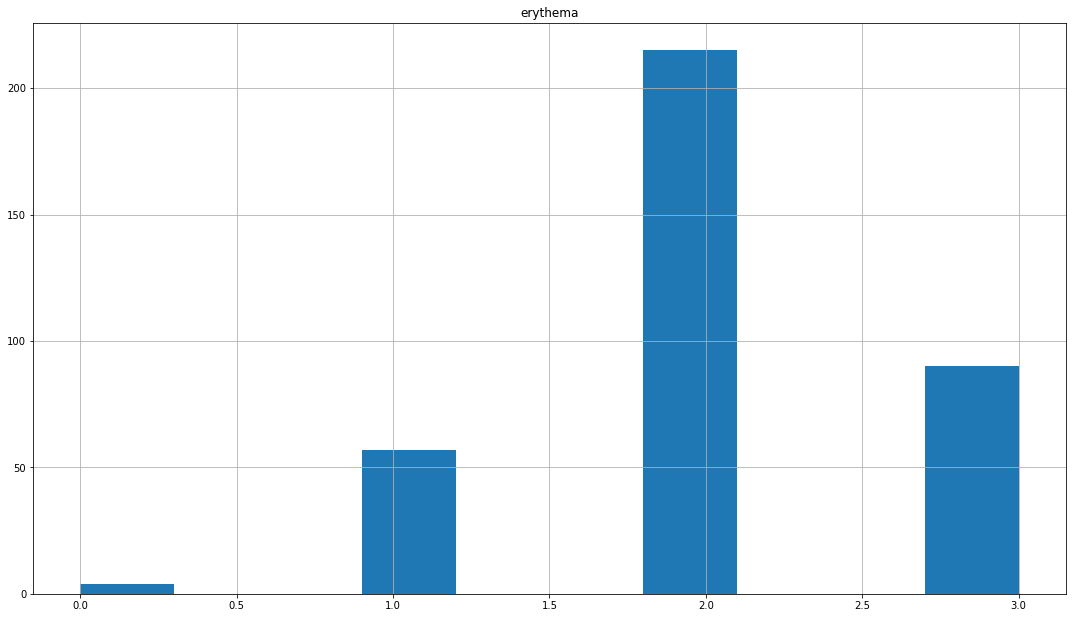

	*****
2    195
1    111
3     52
0      8
Name: scaling, dtype: int64


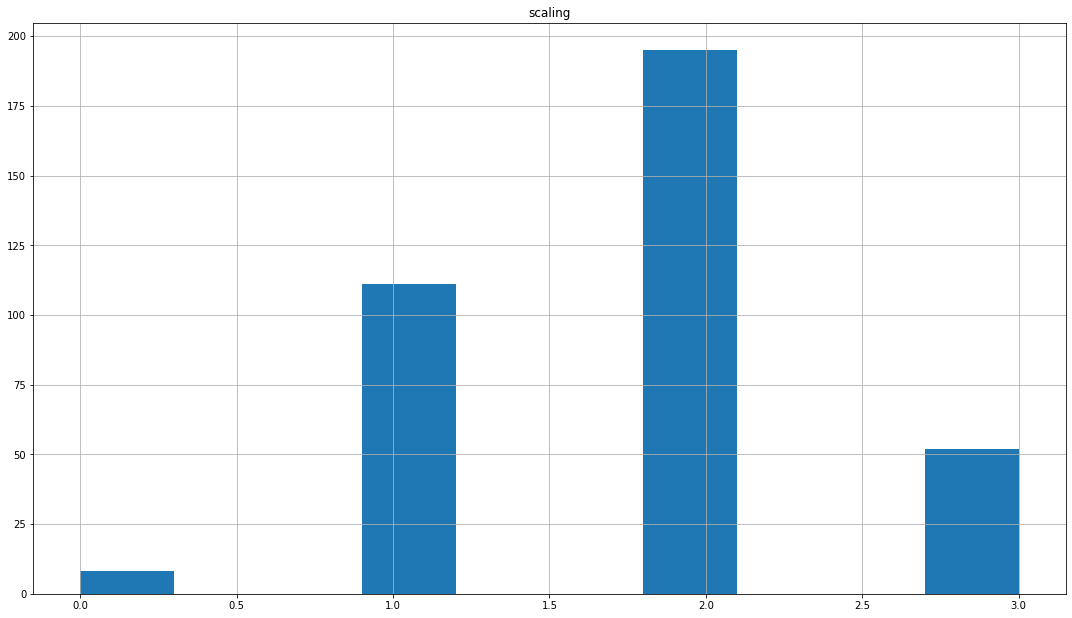

	*****
2    168
1     93
0     59
3     46
Name: definite_borders, dtype: int64


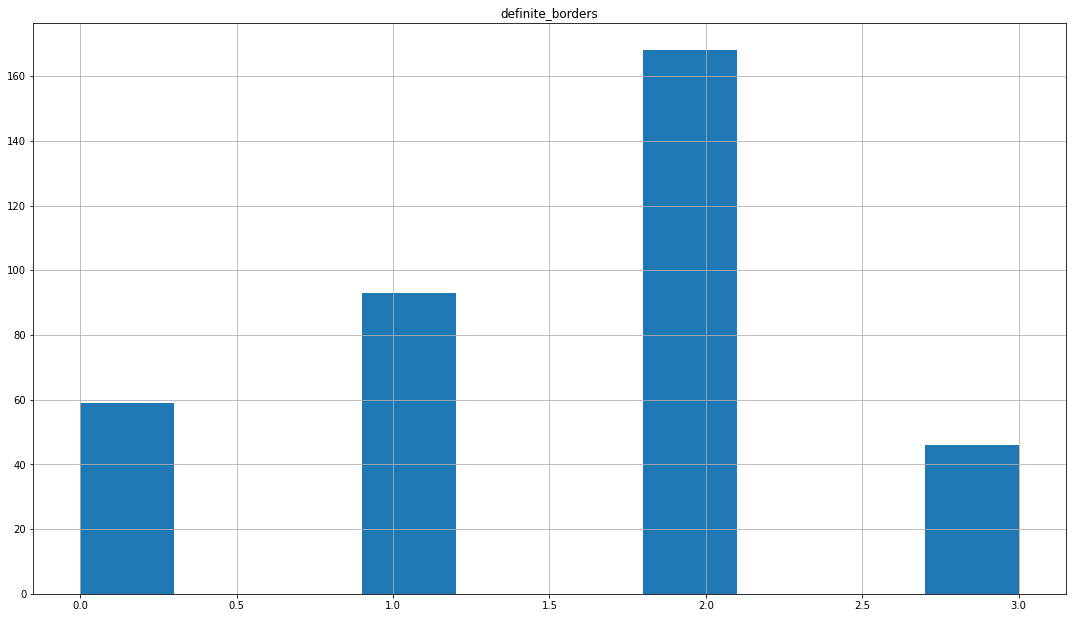

	*****
0    118
2    100
3     76
1     72
Name: itching, dtype: int64


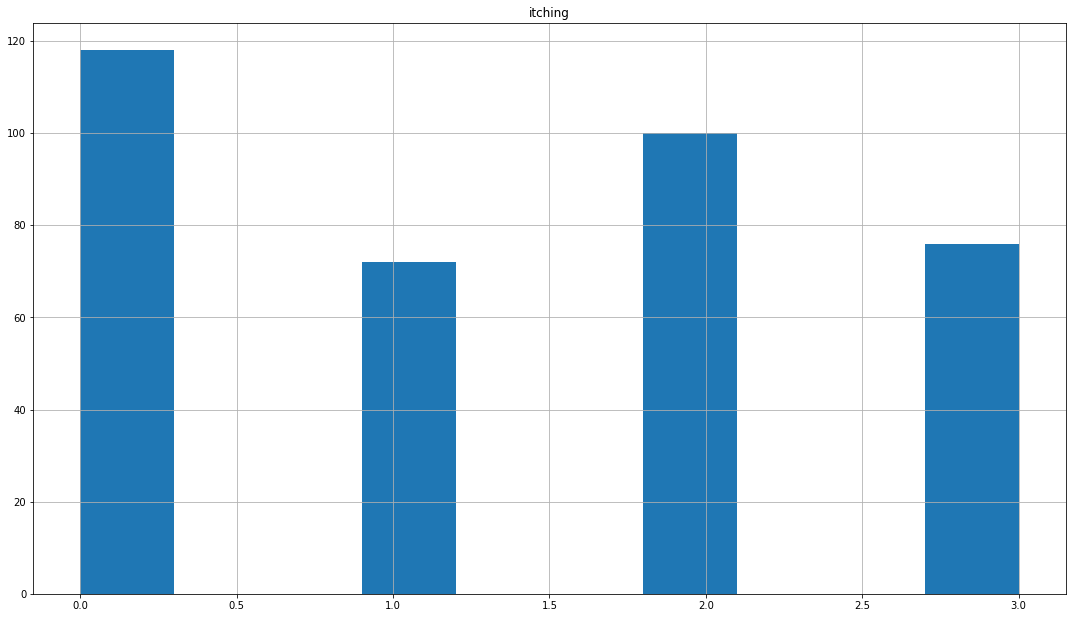

	*****
0    224
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64


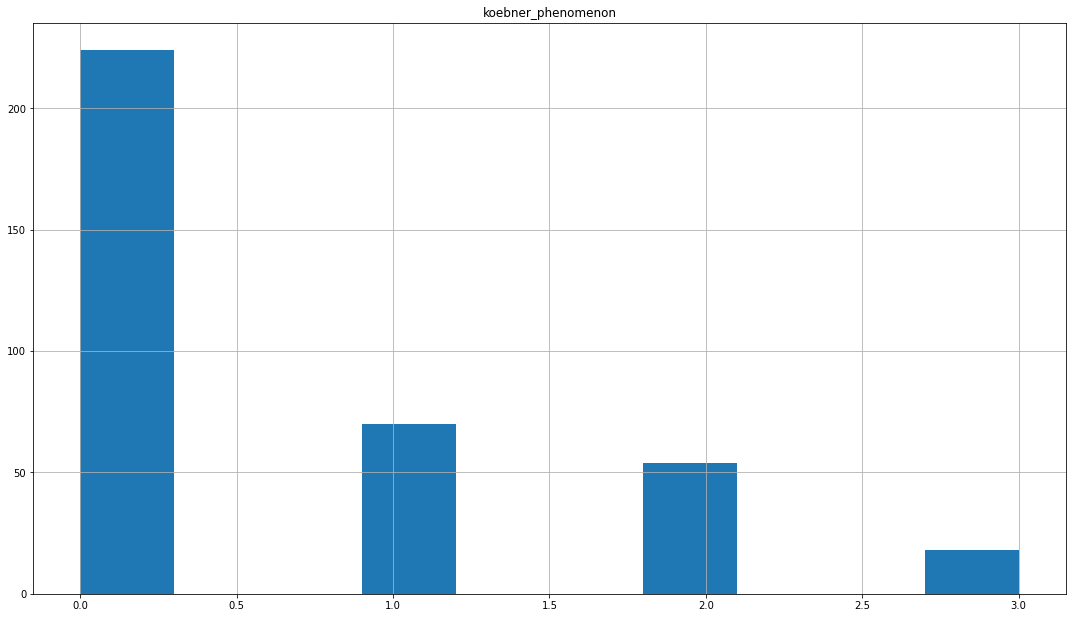

	*****
0    297
2     41
3     27
1      1
Name: polygonal_papules, dtype: int64


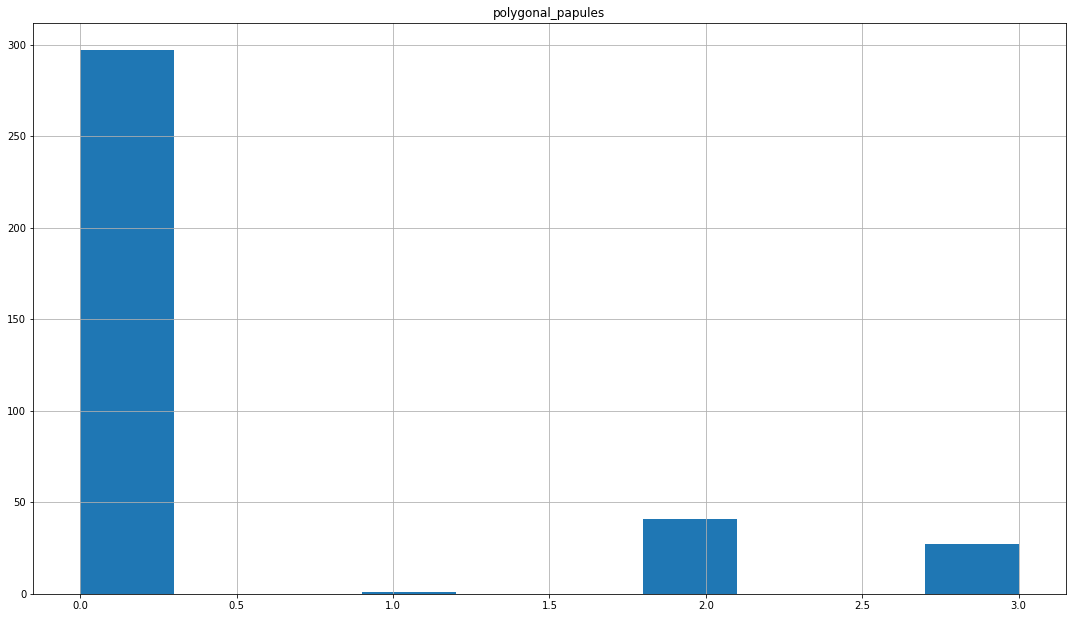

	*****
0    333
2     16
1     11
3      6
Name: follicular_papules, dtype: int64


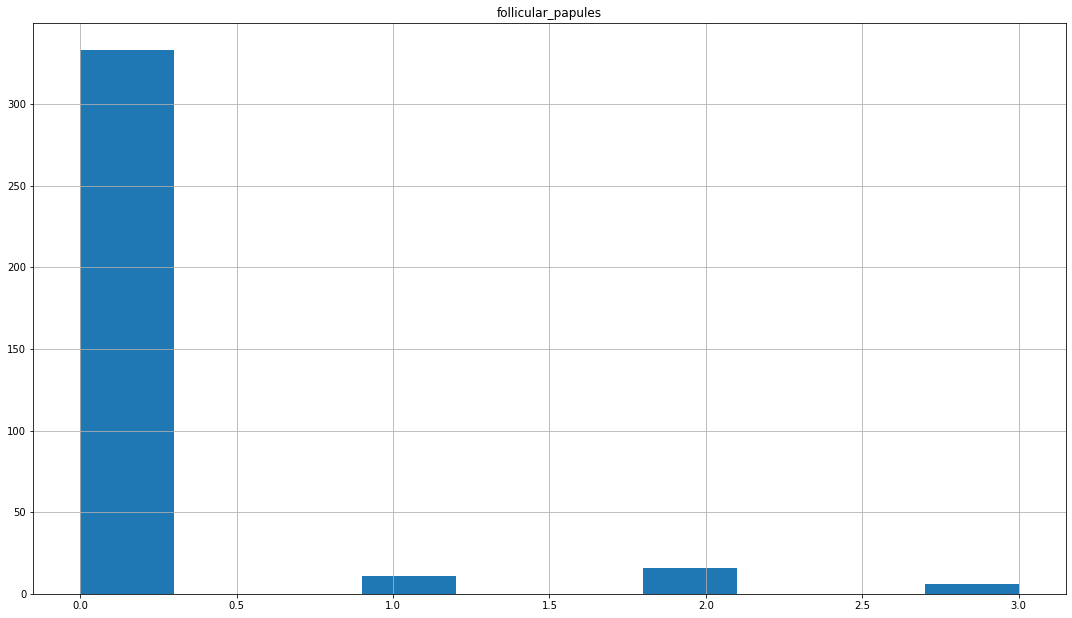

	*****
0    299
2     45
3     13
1      9
Name: oral_mucosal_involvement, dtype: int64


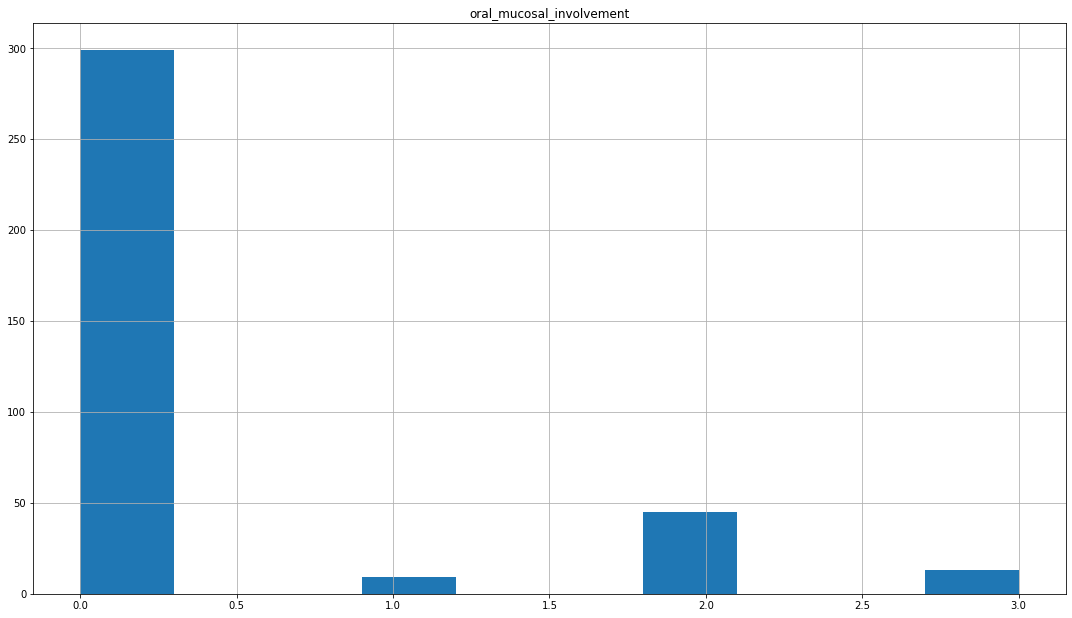

	*****
0    251
2     64
1     28
3     23
Name: knee_and_elbow_involvement, dtype: int64


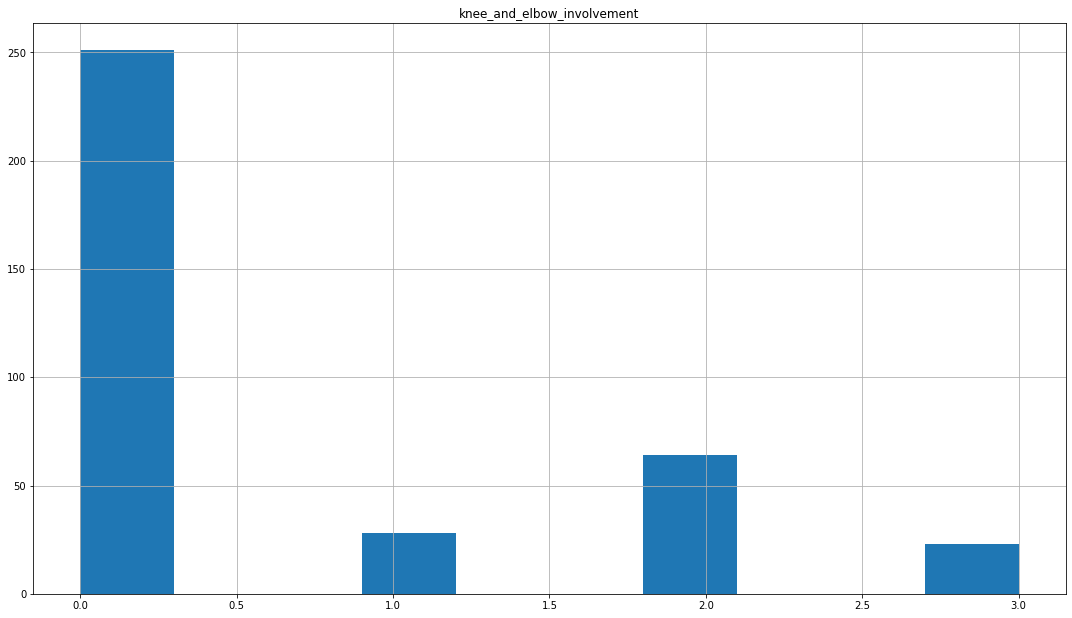

	*****
0    264
2     56
1     30
3     16
Name: scalp_involvement, dtype: int64


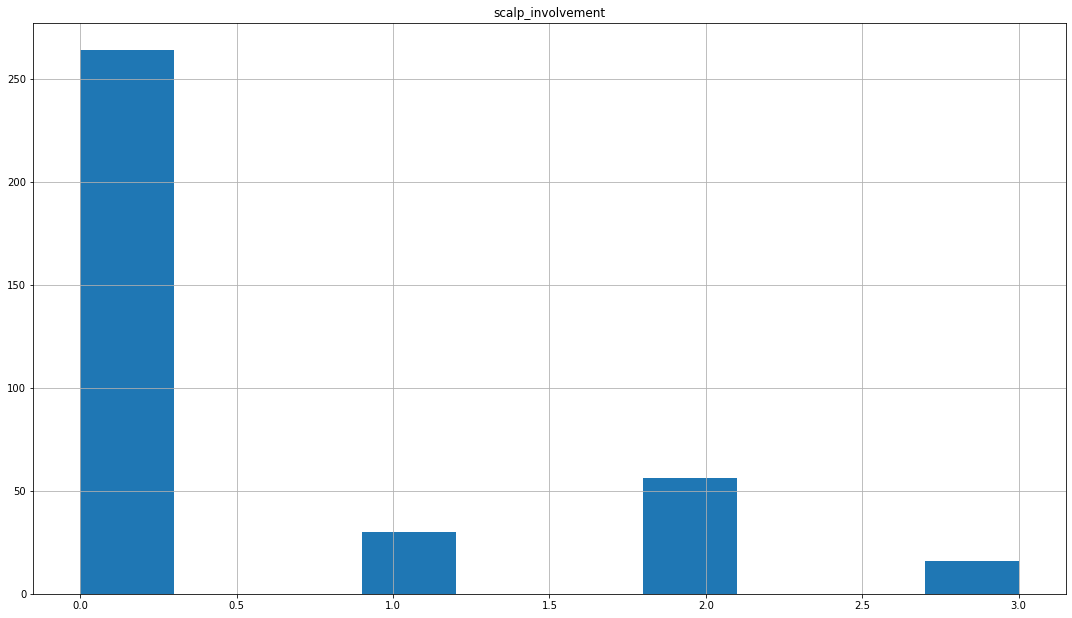

	*****
0    320
1     46
Name: family_history, dtype: int64


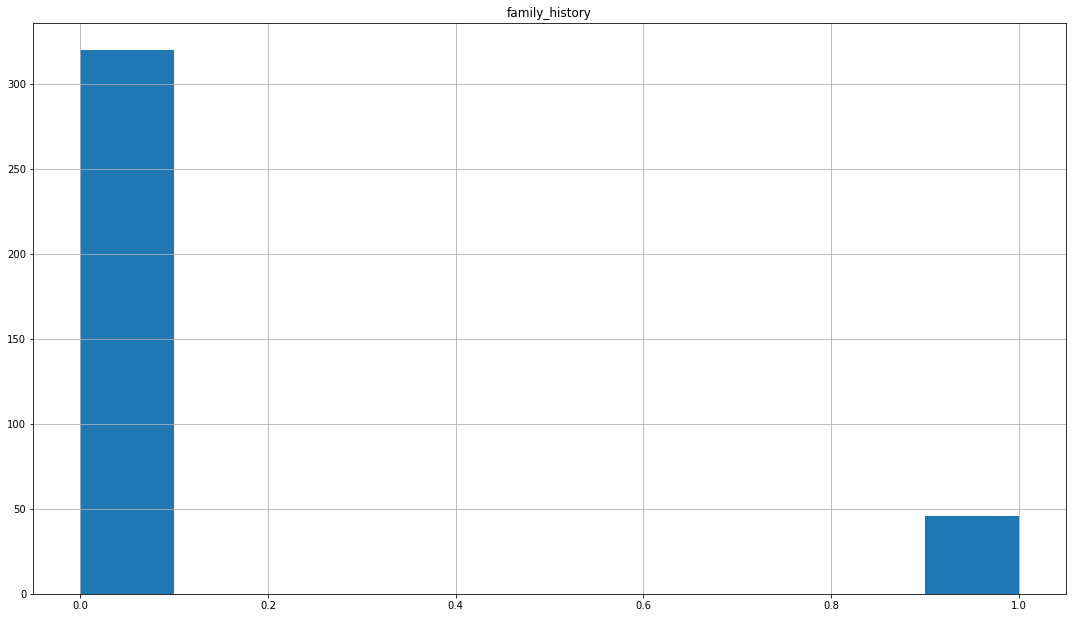

	*****
0    296
2     46
3     16
1      8
Name: melanin_incontinence, dtype: int64


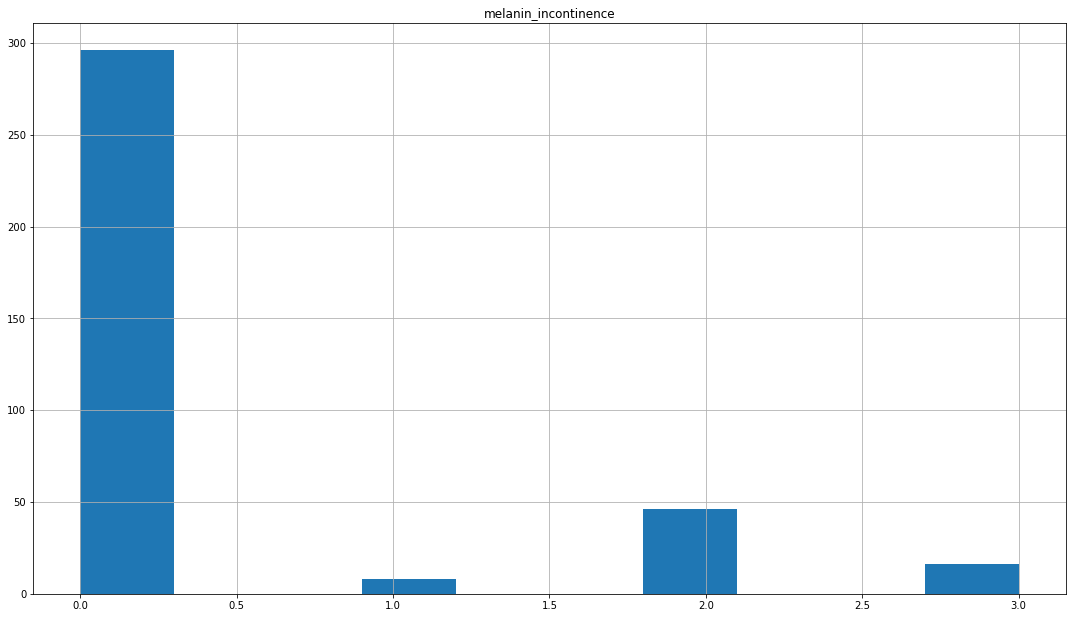

	*****
0    324
1     33
2      9
Name: eosinophils_in_the_infiltrate, dtype: int64


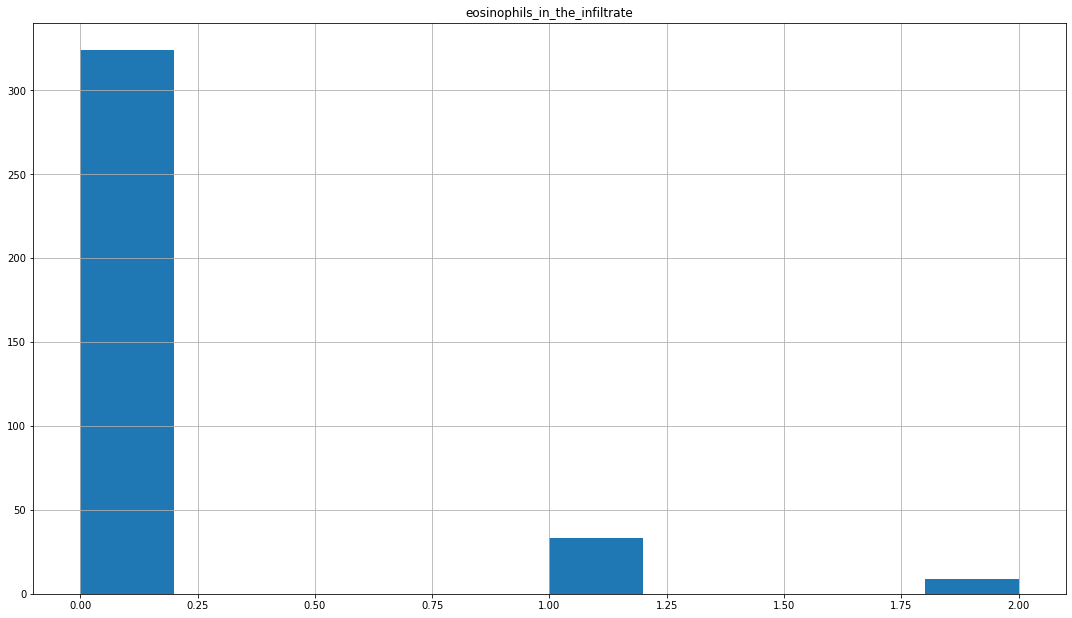

	*****
0    235
1     69
2     55
3      7
Name: PNL_infiltrate, dtype: int64


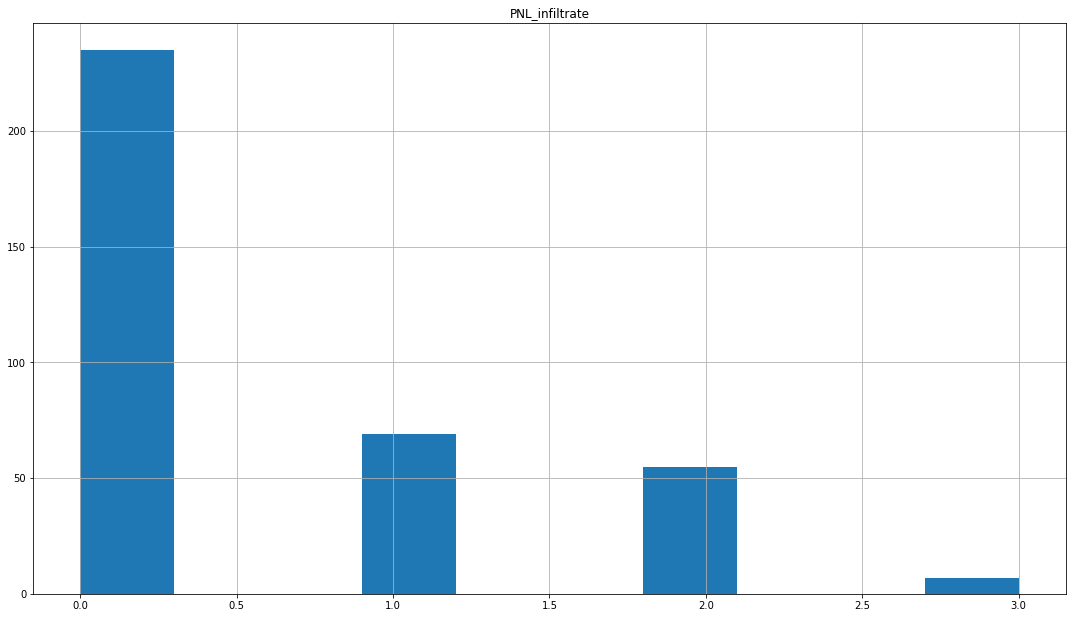

	*****
0    312
3     23
2     23
1      8
Name: fibrosis_of_the_papillary_dermis, dtype: int64


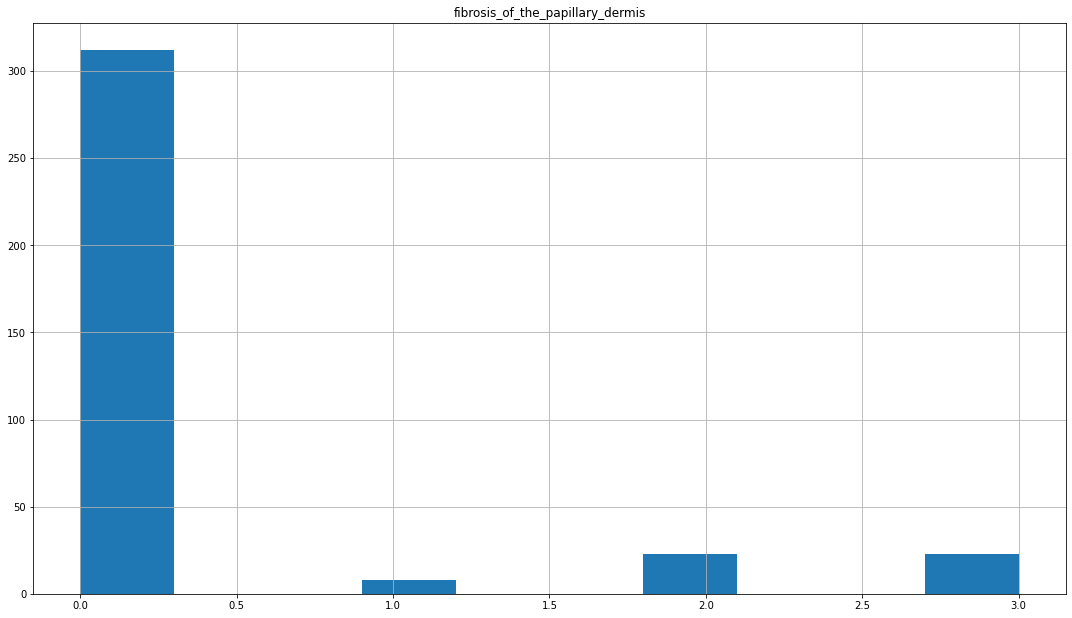

	*****
2    129
0    118
3     62
1     57
Name: exocytosis, dtype: int64


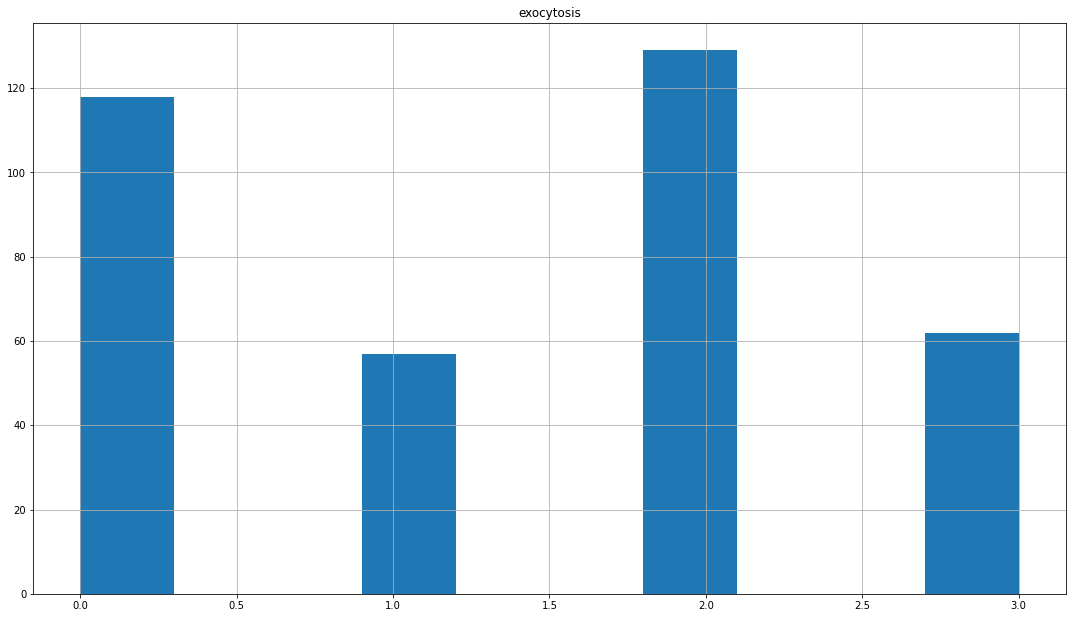

	*****
2    210
3     75
1     71
0     10
Name: acanthosis, dtype: int64


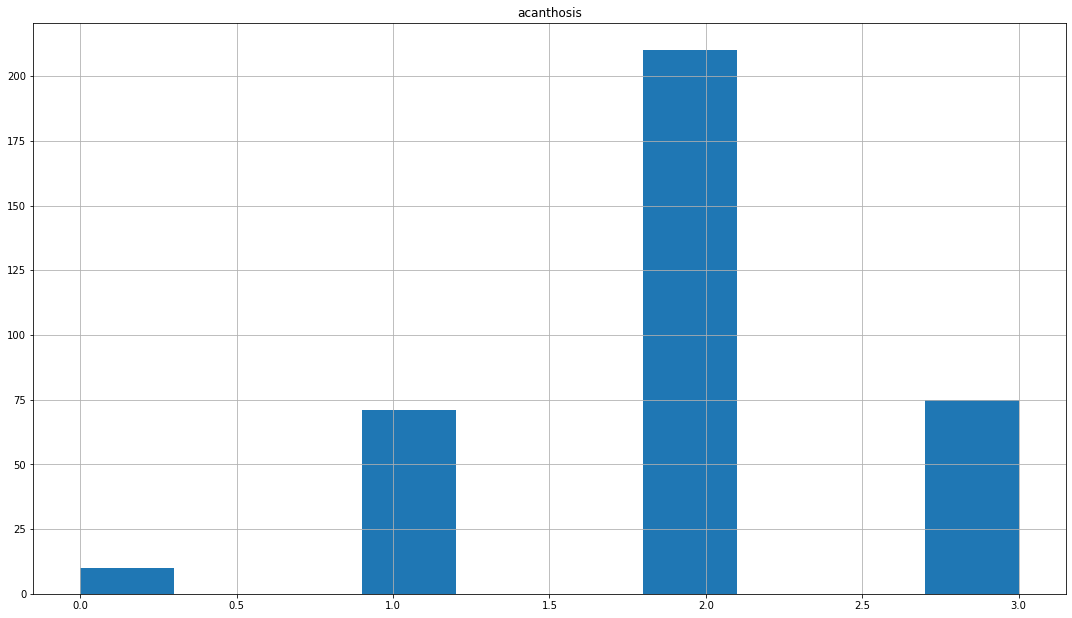

	*****
0    227
1     90
2     44
3      5
Name: hyperkeratosis, dtype: int64


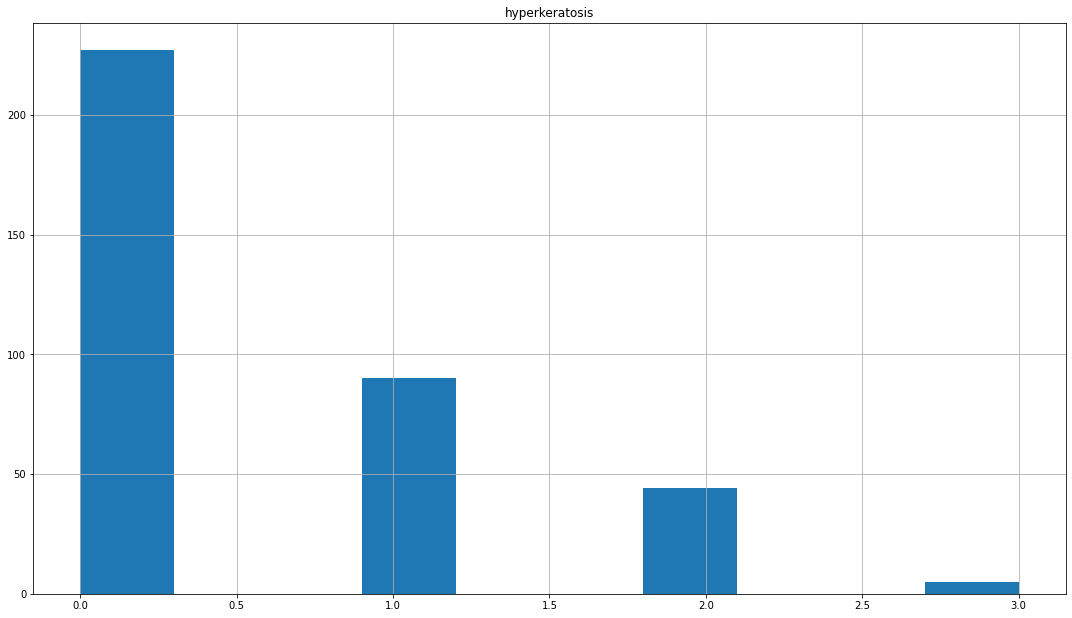

	*****
2    132
1    118
0     86
3     30
Name: parakeratosis, dtype: int64


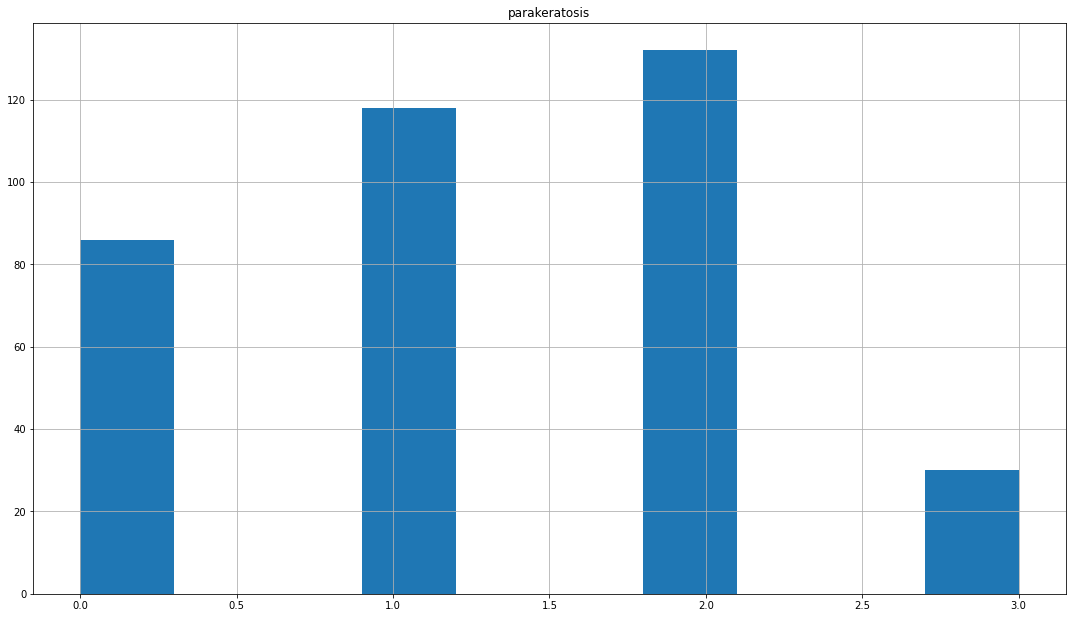

	*****
0    252
2     61
3     34
1     19
Name: clubbing_of_the_rete_ridges, dtype: int64


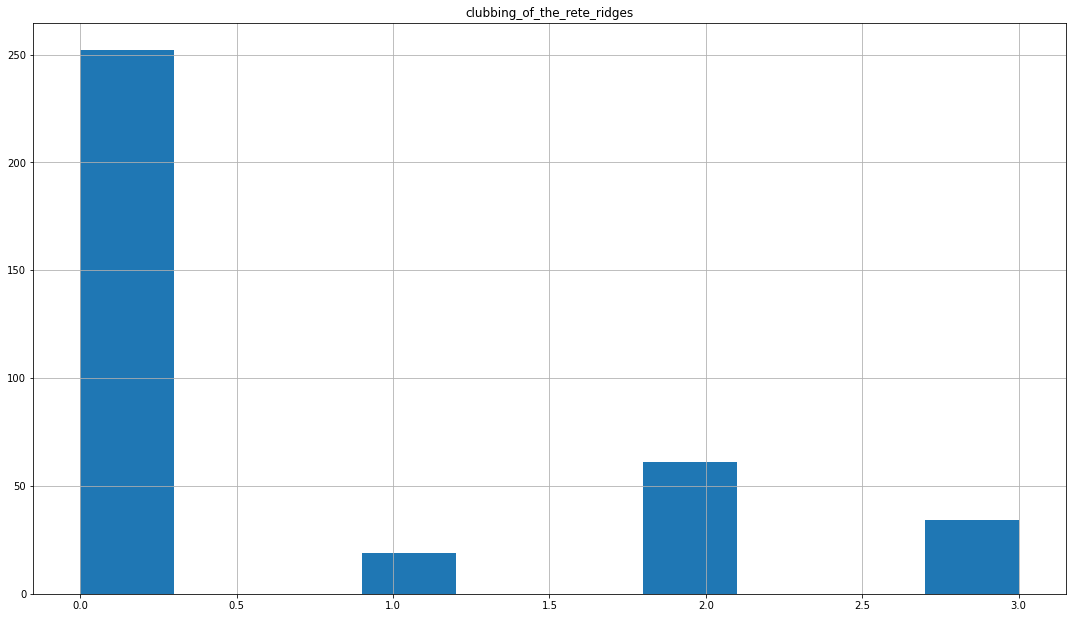

	*****
0    198
2     95
3     50
1     23
Name: elongation_of_the_rete_ridges, dtype: int64


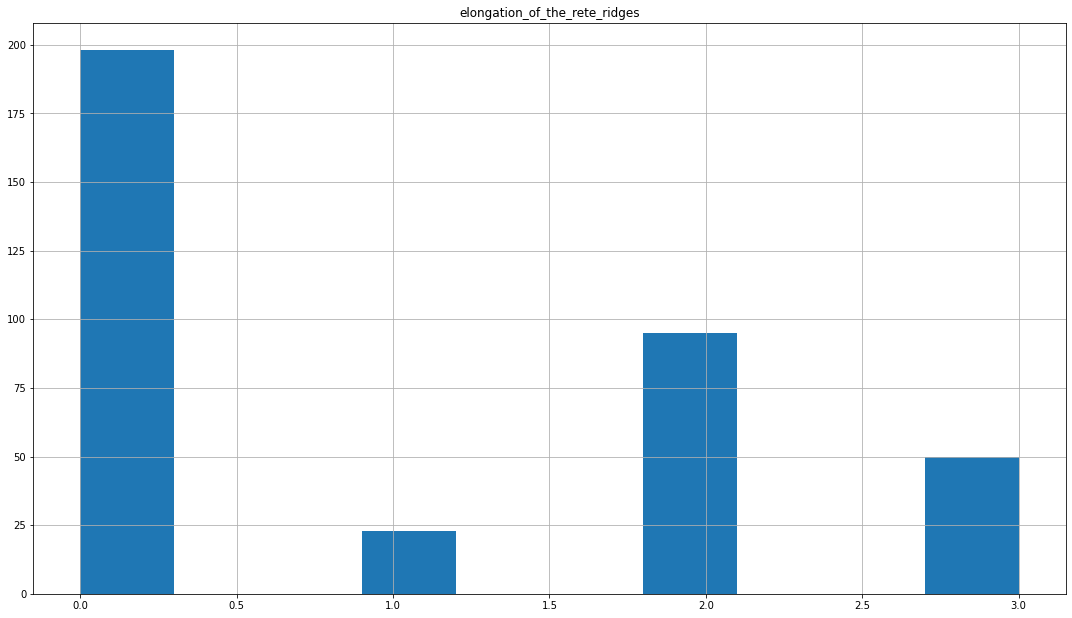

	*****
0    256
2     60
3     31
1     19
Name: thinning_of_the_suprapapillary_epidermis, dtype: int64


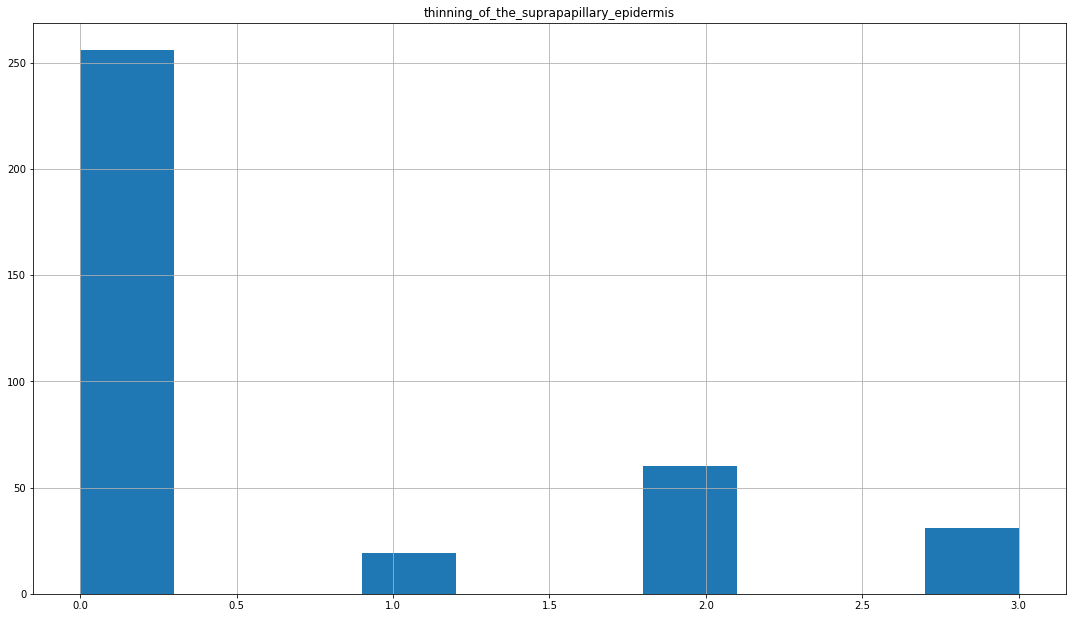

	*****
0    296
1     38
2     26
3      6
Name: spongiform_pustule, dtype: int64


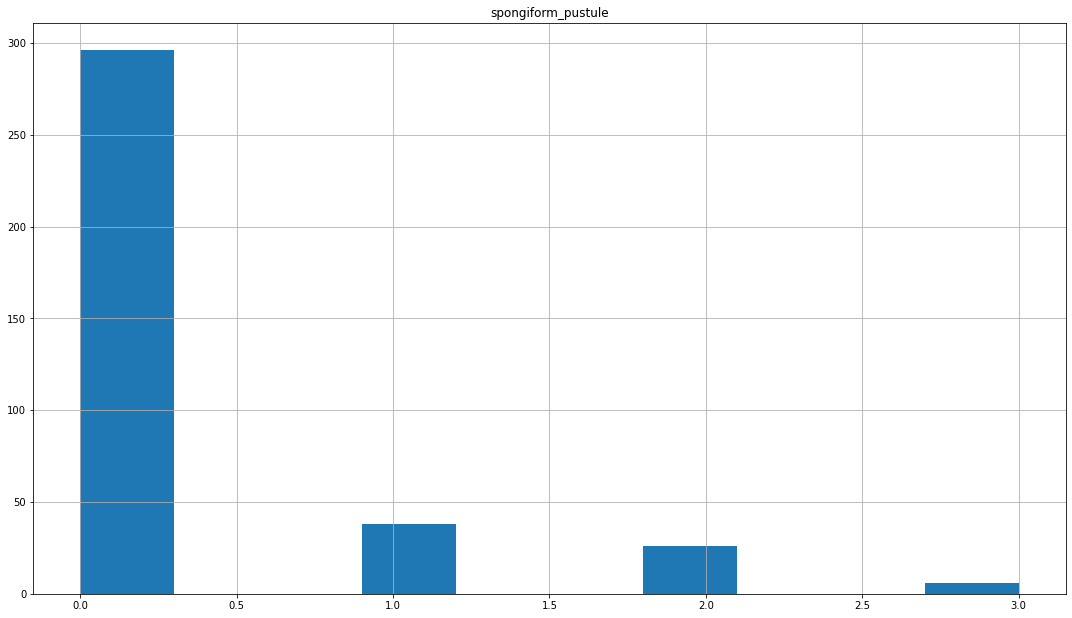

	*****
0    286
1     37
2     33
3     10
Name: munro_microabcess, dtype: int64


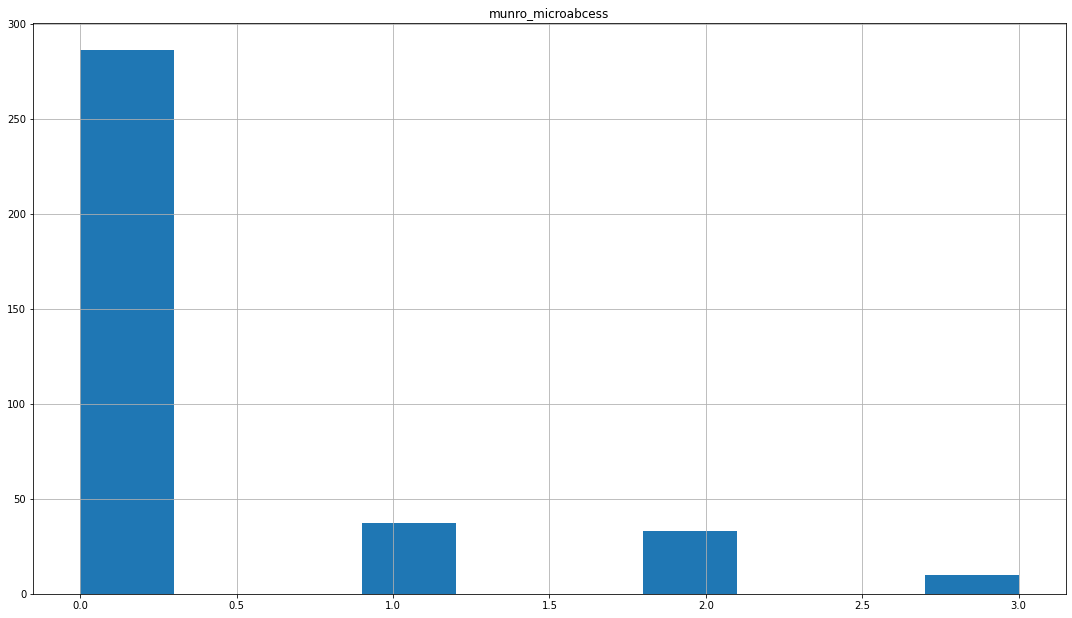

	*****
0    295
2     43
3     15
1     13
Name: focal_hypergranulosis, dtype: int64


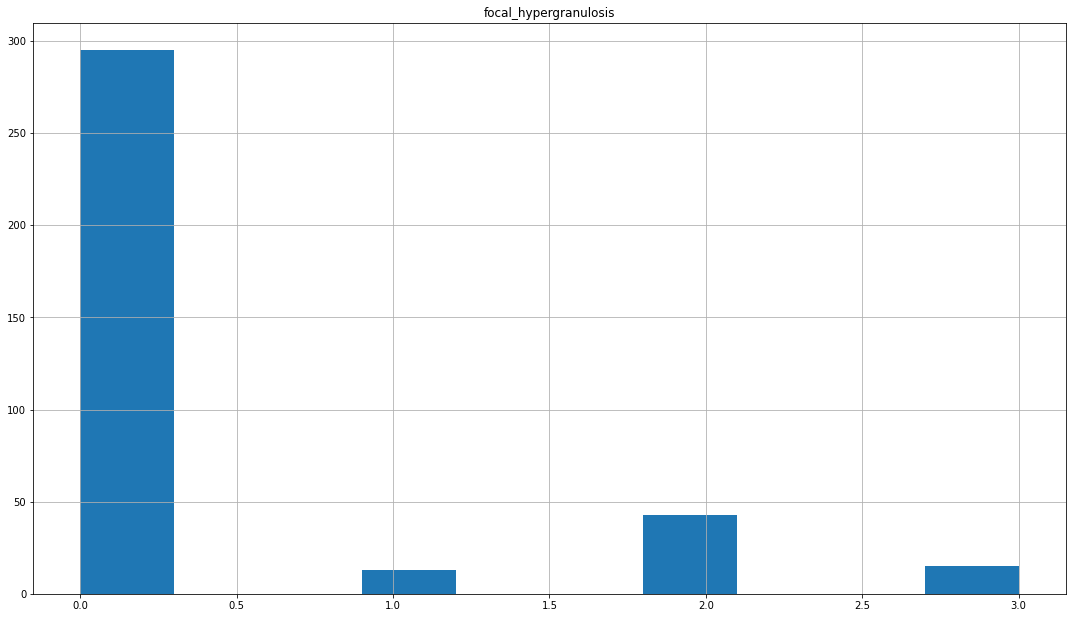

	*****
0    273
2     49
1     30
3     14
Name: disappearance_of_the_granular_layer, dtype: int64


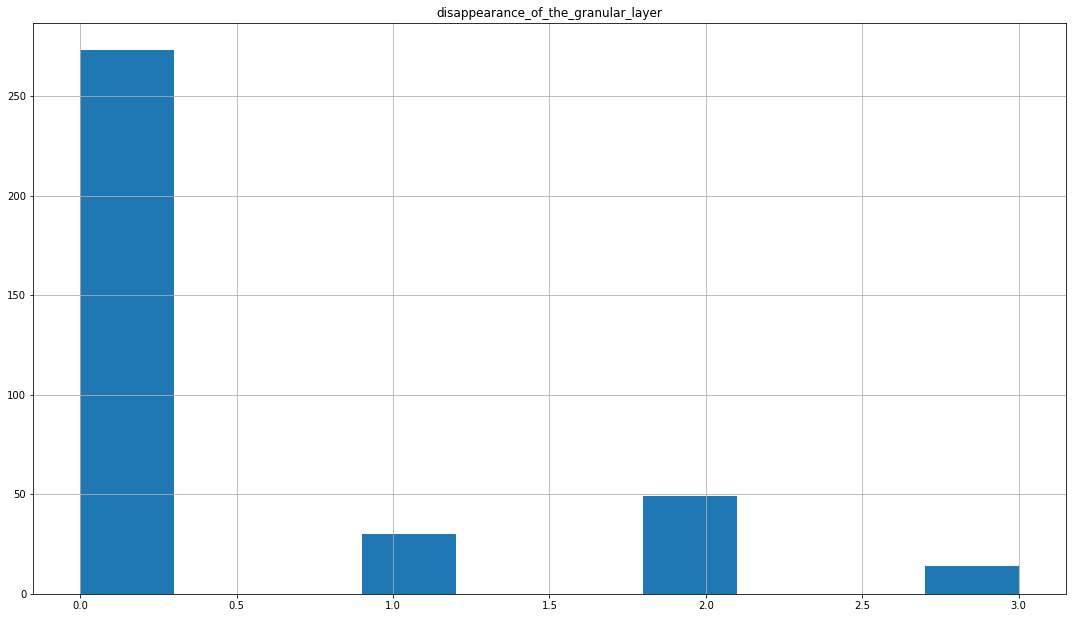

	*****
0    294
2     43
3     26
1      3
Name: vacuolisation_and_damage_of_basal_layer, dtype: int64


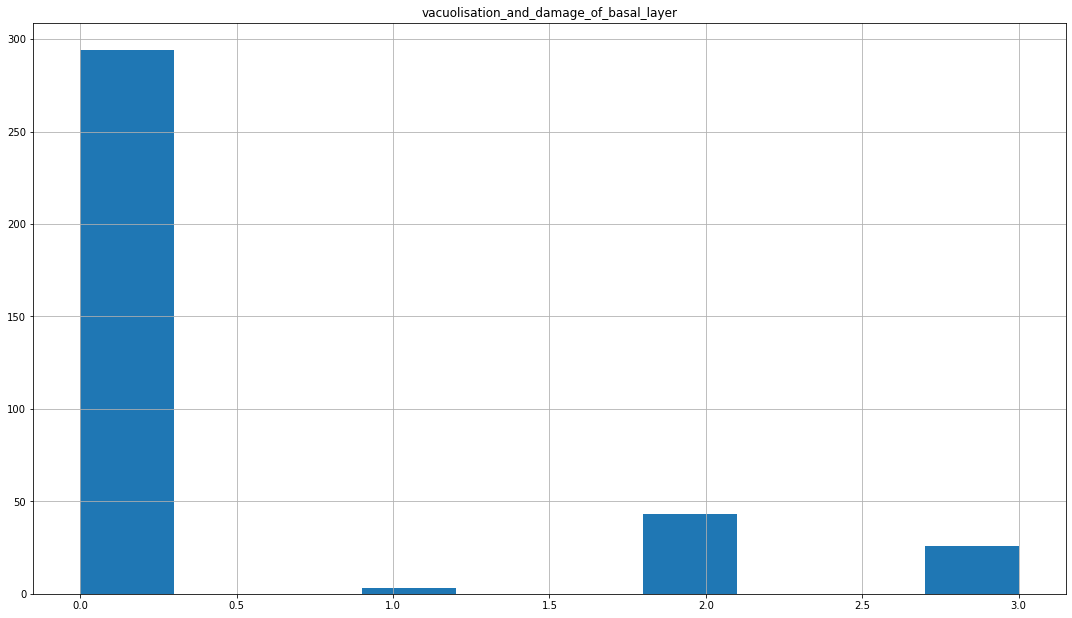

	*****
0    199
2     96
3     43
1     28
Name: spongiosis, dtype: int64


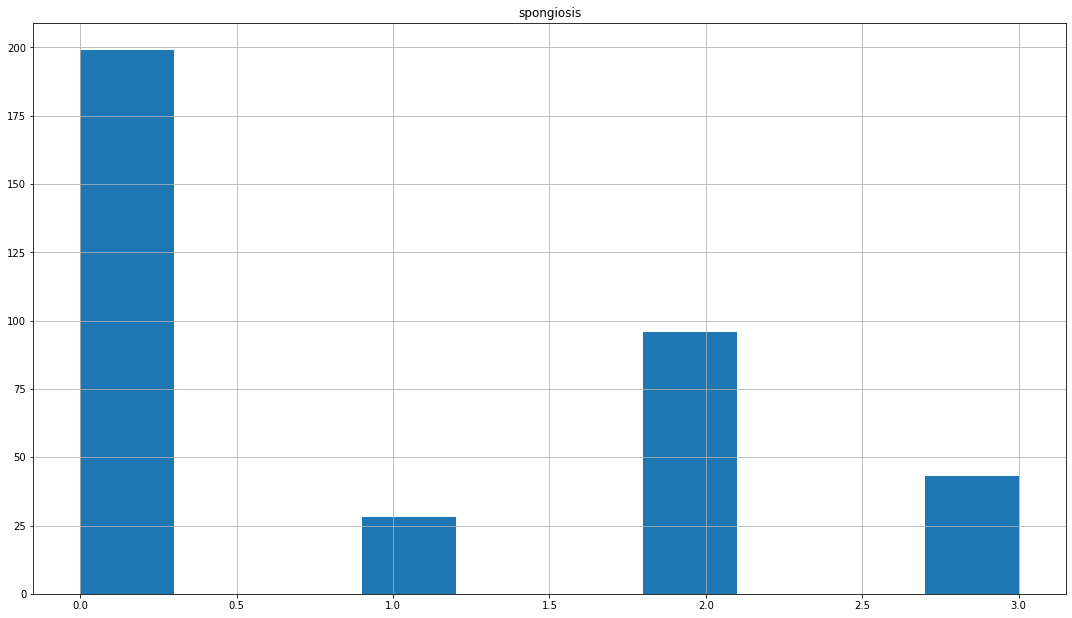

	*****
0    294
2     40
3     27
1      5
Name: saw-tooth_appearance_of_retes, dtype: int64


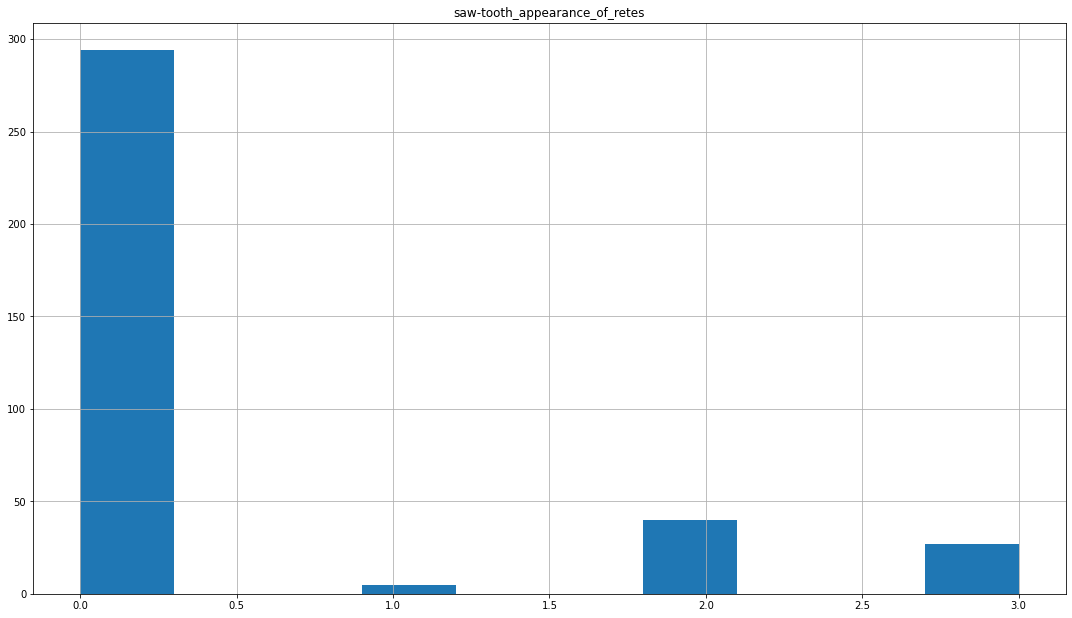

	*****
0    344
1     10
2      8
3      4
Name: follicular_horn_plug, dtype: int64


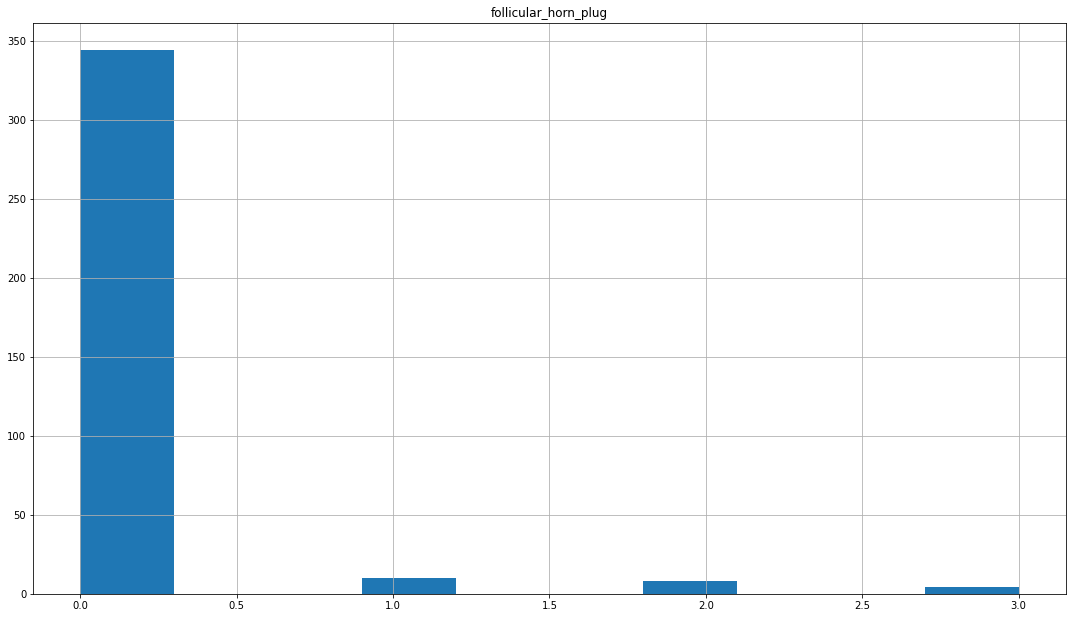

	*****
0    345
2     13
3      4
1      4
Name: perifollicular_parakeratosis, dtype: int64


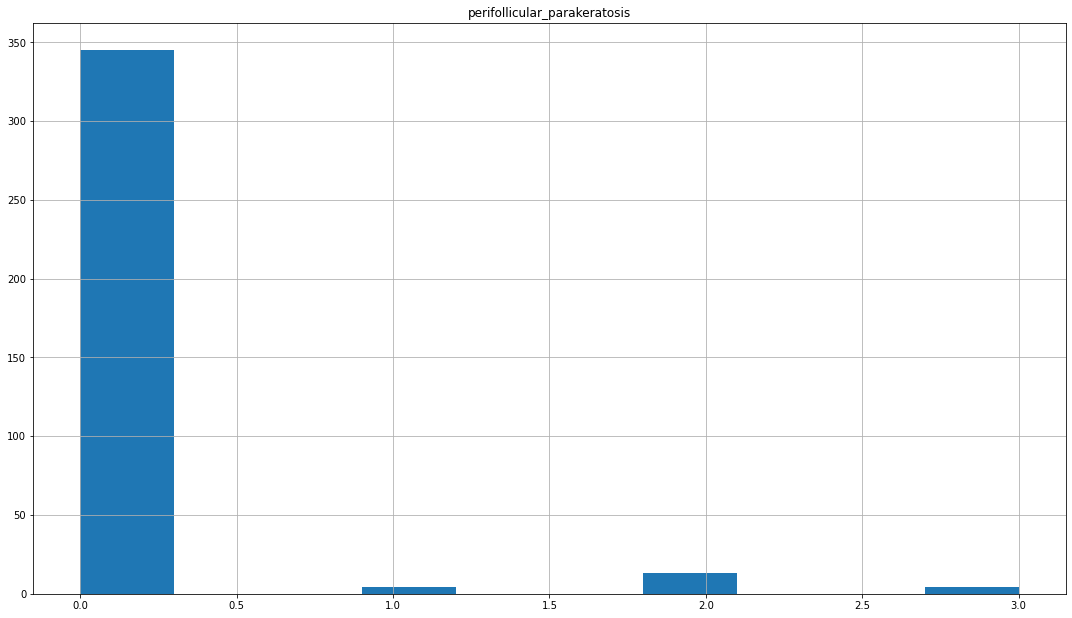

	*****
2    206
1     85
3     62
0     13
Name: inflammatory_monoluclear_inflitrate, dtype: int64


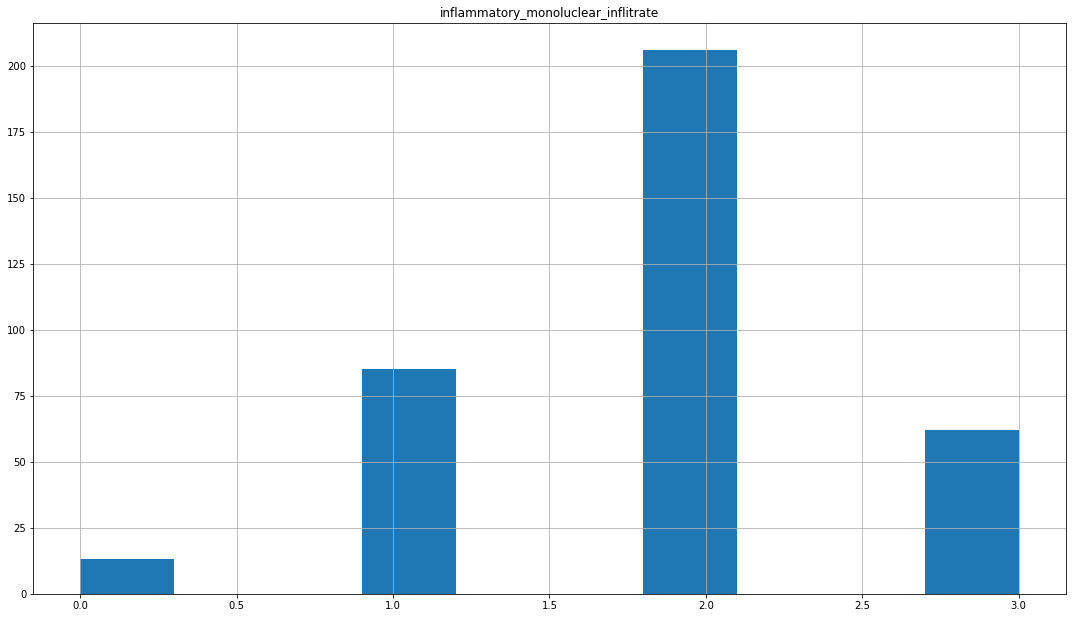

	*****
0    289
3     52
2     22
1      3
Name: band-like_infiltrate, dtype: int64


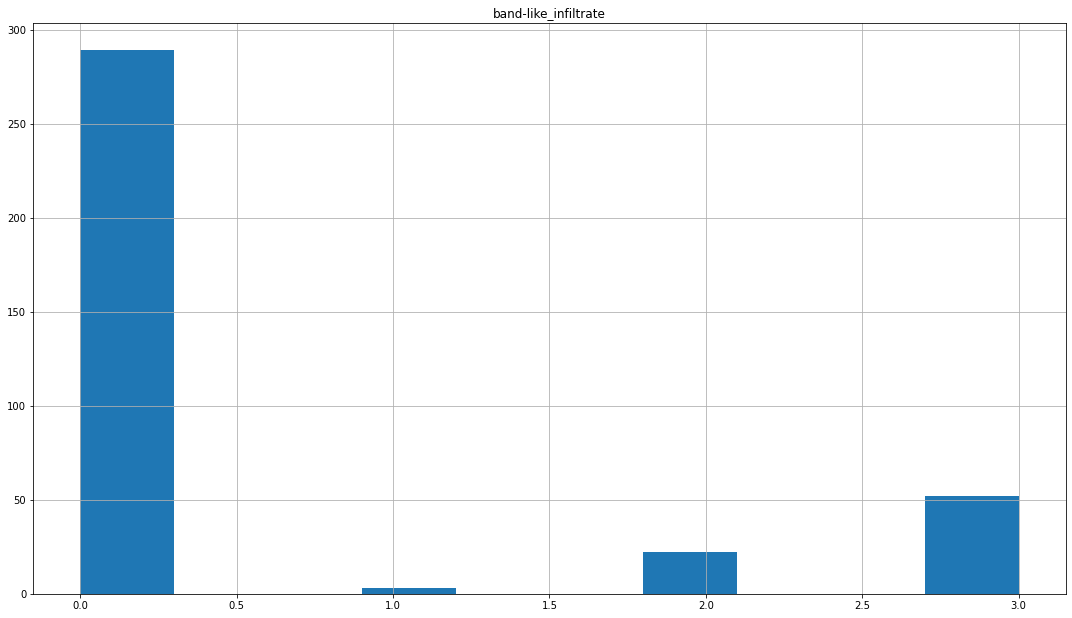

	*****
40.0    17
50.0    17
27.0    16
36.0    16
22.0    15
        ..
63.0     1
68.0     1
67.0     1
64.0     1
0.0      1
Name: Age, Length: 61, dtype: int64


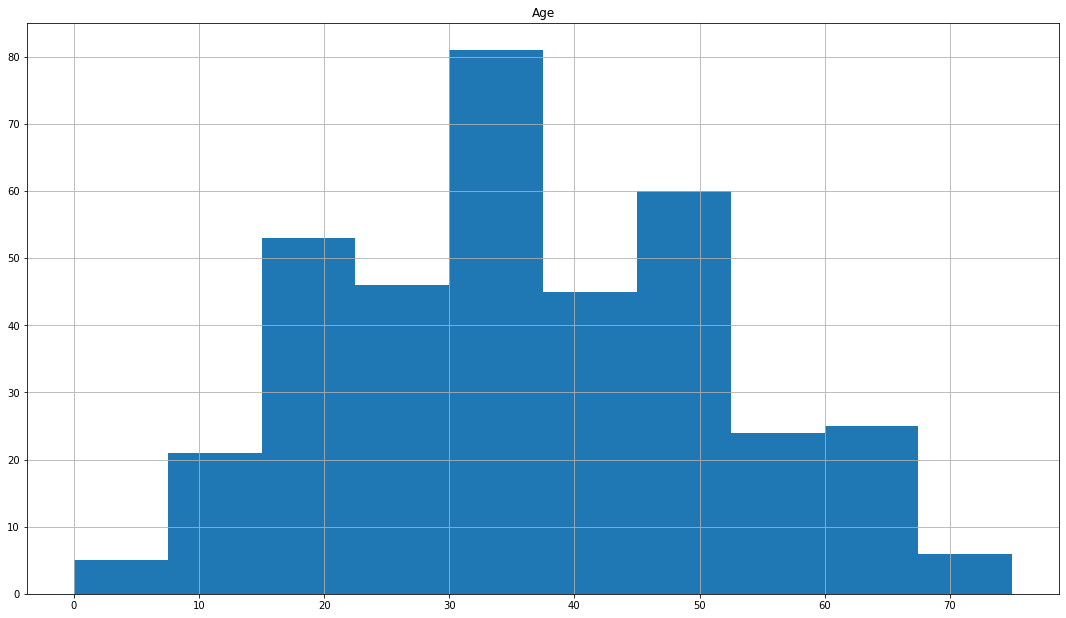

	*****
1    112
3     72
2     61
5     52
4     49
6     20
Name: class_label, dtype: int64


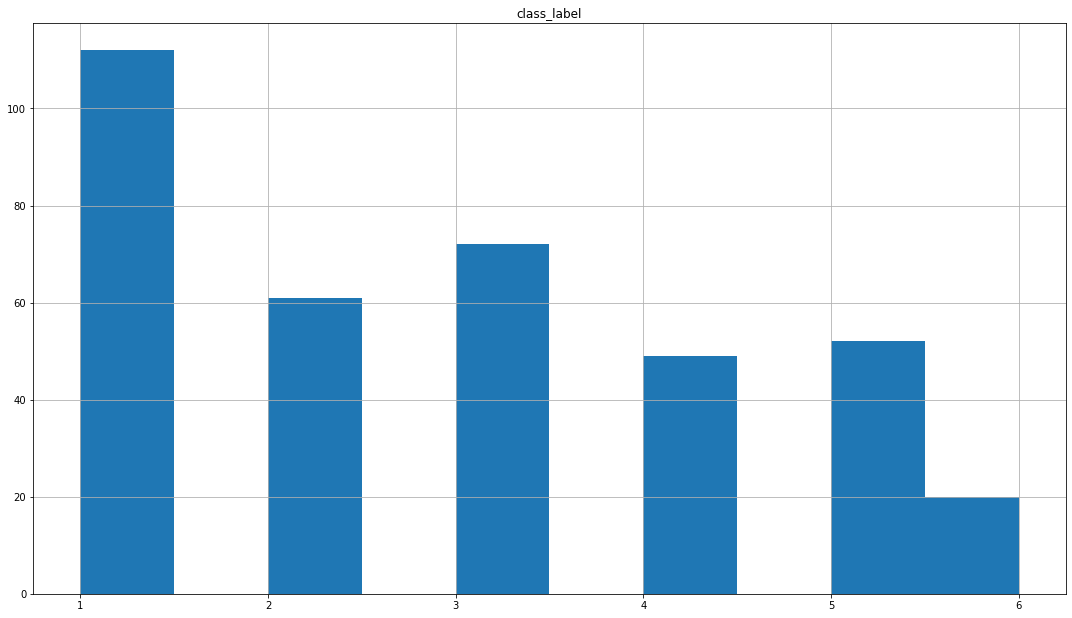

	*****


In [8]:
for column_name in derma.columns:
    print(derma[column_name].value_counts(dropna=False))
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    derma[column_name].hist()
    plt.title(column_name)
    plt.show()
    print('\t*****')

In [12]:
derma.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

## Pairplot

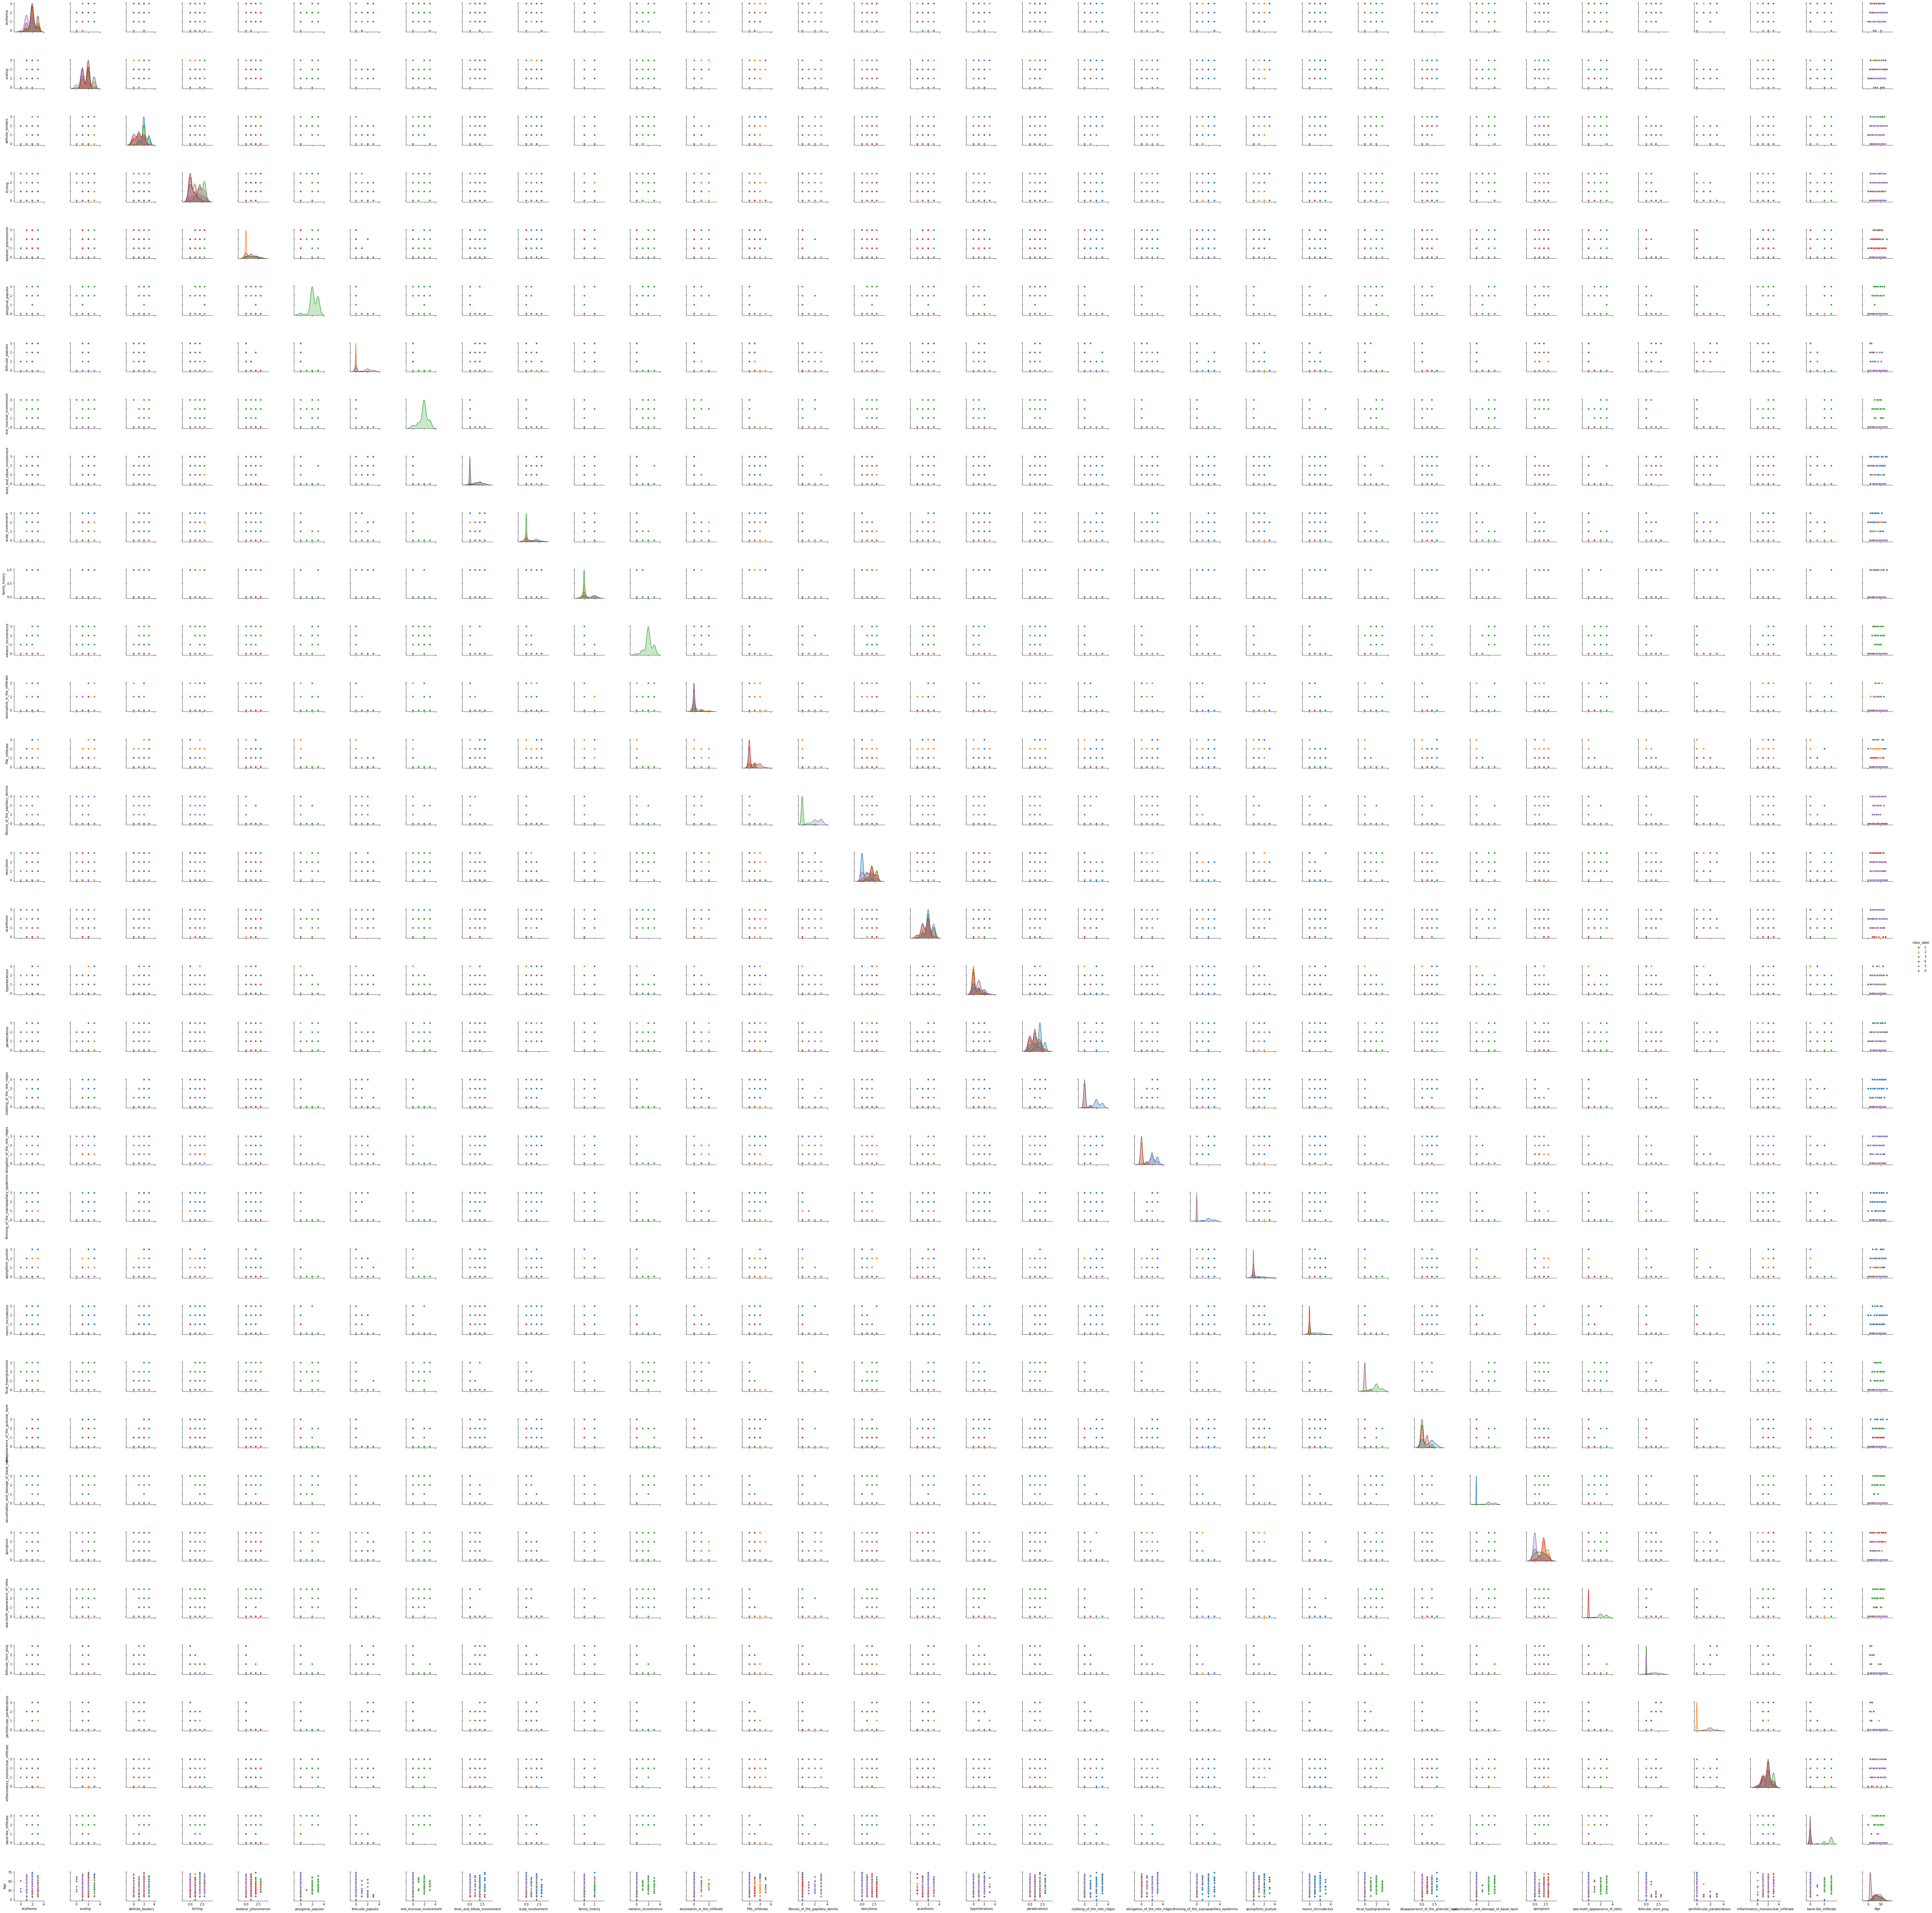

In [13]:
sns.pairplot(derma, hue = 'class_label')
plt.show()

## Correlations

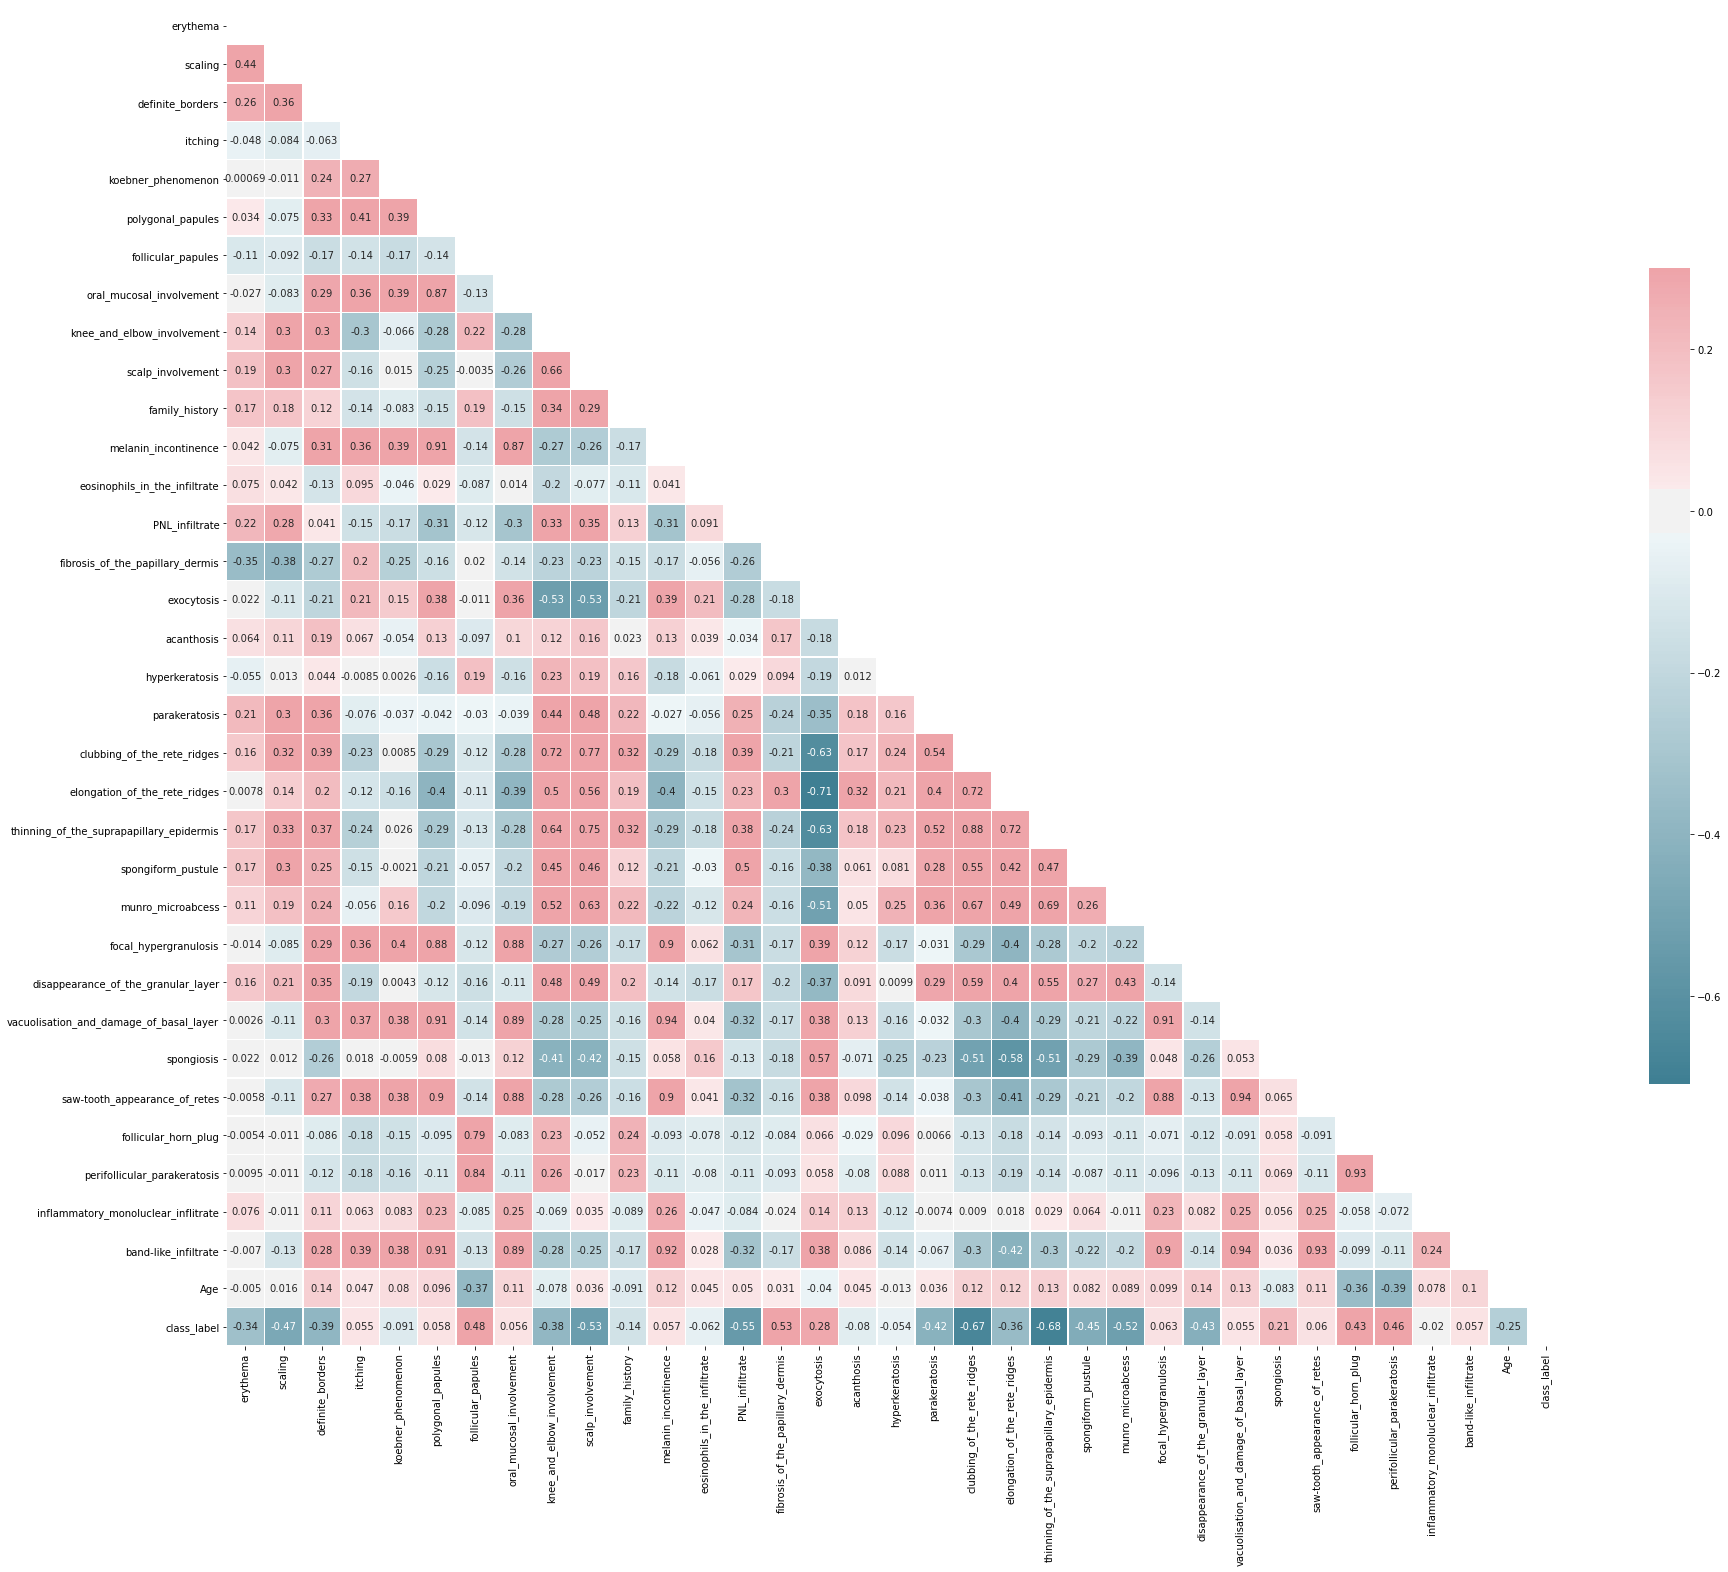

In [14]:
# Compute the correlation matrix
corr = derma.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr_plot.figure.savefig(os.path.join(OUTPUT_DATA_PATH, "DERMA_COORELATIONS.png"))


1. We can see "band-like_infiltrate" is a good candidate of future removal since it has a high correlation with "melanin_incontinence", "focal_hypergranulosis", "vacuolisation_and_damage_of_basal_layer", and "saw-tooth_appreance_of_retes"

2. "perifollicular_paraketosis" has a high correlation with "follicular_home_plug"

3. "saw-tooth_appreance_of_retes" has a high correlation with "vacuolisation_and_damage_of_basal_layer" and "melanin_incontinence"

4. "vacuolisation_and_damage_of_basal_layer" has a high correlation with "polygonal_papules"

5. "focal_hypergranulosis" has a high correlation with "melanin_incontinence"

6. "melanin_incontinence" has a high correlation with "polygonal_papules"

Let us first build a base model to decide on feature engineering

In [15]:
from sklearn.preprocessing import LabelEncoder
X, y = derma.iloc[:, :-1].astype('float32'), LabelEncoder().fit_transform(derma.iloc[:, -1])
X.shape, y.shape

((366, 34), (366,))

## Baseline Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
##class_weight- “balanced” uses the values of y to adjust weights inversely proportional to class frequencies 
##in the input data as n_samples / (n_classes * np.bincount(y))

##ccp_alpha- Complexity parameter used for Minimal Cost-Complexity Pruning. 
##The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen
rf = OneVsRestClassifier(estimator = GaussianNB())

# Create RepeatedStratifiedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)

# Calculate accuracy using `cross_val_score()` with model instantiated, data to fit, target variable, 'accuracy' scoring, cross validator, n_jobs=-1, and error_score set to 'raise'
n_scores = cross_val_score(rf, X, y, scoring='f1_weighted', cv=cv, error_score='raise')

# Print mean and standard deviation of n_scores: 
print(n_scores)
print('Baseline scores \n mean f1 weighted: %.3f with a %.3f standard deviation in scores ' % (np.mean(n_scores), np.std(n_scores)))

[0.79141939 0.83496683 0.83327483 0.91673813 0.73727624 0.72792793
 0.76163004 0.81489899 0.76851852 0.83399471 0.77161172 0.85087885
 0.89009009 0.83643384 0.76115527 0.75250965 0.83280423 0.80009158
 0.87198912 0.8476431  0.85413595 0.76193536 0.83134433 0.83474903
 0.91744472 0.71603472 0.90940171 0.69002363 0.80009158 0.78549383]
Baseline scores 
 mean f1 weighted: 0.811 with a 0.058 standard deviation in scores 


So, we want to do better than 81.1%

## Stacking Classifier

Stacking classifier takes:
1. estimators: List of baseline classifiers

2. final_estimator: Defined meta classifier

3. cv: Number of cross validations to perform

In [18]:
## for these we will have to scale the age column but, only positively because all ogther columns are positive
from sklearn.preprocessing import MaxAbsScaler
X.loc[:, ["Age"]] = MaxAbsScaler().fit_transform(X.loc[:, ["Age"]])
X.reset_index(inplace = True)

In [31]:
def create_stacking_models():
    base_models = list()
    base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                                     , weights = 'distance')
                       ))
    base_models.append(('SVC', SVC(kernel = 'linear'
                                   , class_weight = 'balanced'
                                  , break_ties = True)
                       ))    
    base_models.append(('GNB', GaussianNB()))
    base_models.append(('RF', RandomForestClassifier(n_estimators= 200, 
                                                   oob_score = True, 
                                                   class_weight = "balanced", 
                                                   random_state = 20, 
                                                   ccp_alpha = 0.1)
                       ))

    
    meta_model = LogisticRegression()
    final_model = StackingClassifier(estimators = base_models, ##Base estimators which will be stacked together
                                     final_estimator = meta_model,
                                     cv = 5
                                    )
    return final_model

def models_all():
    all_models = dict()
    all_models['KNNC']= KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                             , weights = 'distance')
    all_models['SVC']= SVC(kernel = 'linear'
                           , class_weight = 'balanced'
                          , break_ties = True
                          )
    all_models['RF']= RandomForestClassifier(n_estimators= 200, 
                                                   oob_score = True, 
                                                   class_weight = "balanced", 
                                                   random_state = 20, 
                                                   ccp_alpha = 0.15)
    all_models['GNB'] = GaussianNB()
    all_models['Stacking'] = create_stacking_models()
    return all_models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, error_score='raise')
    return scores



In [32]:
model_results = list()
models = models_all()
names = list()

# Create a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)
#     print(model_results)
    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

>KNNC 0.689 (0.071) 

>SVC 0.966 (0.024) 

>RF 0.817 (0.051) 

>GNB 0.866 (0.044) 

>Stacking 0.967 (0.021) 



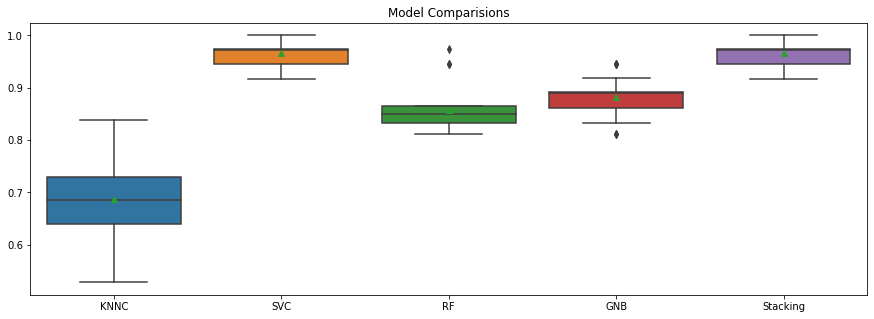

In [28]:
plt.figure(figsize=(15,5))
fig = sns.boxplot(x=names, y=model_results, showmeans=True)
# plt.xlabel(list(names))
# plt.ylabel(list(model_results))
plt.title("Model Comparisions")
plt.show(fig)